
Missing Values Check:
letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64
Dataset Summary:
Total Samples : 20000
Total Features : 16
Number of Classes : 26

Classes present :  ['T' 'I' 'D' 'N' 'G' 'S' 'B' 'A' 'J' 'M' 'X' 'O' 'R' 'F' 'C' 'H' 'W' 'L'
 'P' 'E' 'V' 'Y' 'Q' 'U' 'K' 'Z']


C:\Users\Aarush\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.1638 - loss: 2.7161
Epoch 2/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3382 - loss: 2.0380
Epoch 3/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4166 - loss: 1.8493 
Epoch 4/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.4506 - loss: 1.7522
Epoch 5/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4750 - loss: 1.6912
Epoch 6/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.4886 - loss: 1.6495
Epoch 7/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5085 - loss: 1.6192
Epoch 8/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5157 - loss: 1.5953
Epoch 9/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5223 - loss: 1.5750
Epoch 10/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5302 - loss: 1.5593
Epoch 11/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5347 - loss: 1.5452 
Epoch 12/20
3200/3200

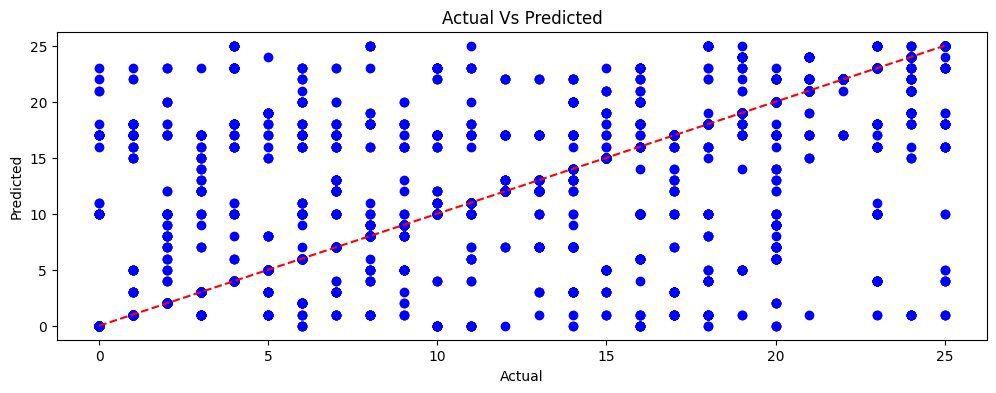

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model,to_categorical
from scikeras.wrappers import KerasClassifier
from IPython.display import Image
from ann_visualizer.visualize import ann_viz

#Importing Dataset
df = pd.read_csv("Alphabets_data.csv")

print("\nMissing Values Check:")
print(df.isnull().sum())
df.dropna(inplace=True)

print("Dataset Summary:")
print(f"Total Samples : {df.shape[0]}")
print(f"Total Features : {df.shape[1] - 1}")   # excluding label
print(f"Number of Classes : {df['letter'].nunique()}")
print("\nClasses present : ", df['letter'].unique())

X = df.drop("letter",axis=1)
y = df["letter"]

num_features = X.select_dtypes(include=["int64","float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

#Encoding
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)

#Train-Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Scaling
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])


#Creating ANN model
def create_model(activation="relu",optimizer="adam"):
 model = Sequential()
 model.add(Dense(8,input_dim=X_train.shape[1],activation=activation))
 model.add(Dense(4,activation=activation))
 model.add(Dense(y.shape[1],activation="softmax"))
 model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])
 return model

model = create_model()
plot_model(model,to_file="ann_model1.png",show_shapes=True,show_layer_names=True,rankdir="TB")
Image(filename="ann_model1.png")

history=model.fit(X_train,y_train,epochs=20,batch_size=5,verbose=1)

y_pred = model.predict(X_test)
y_test_labels = np.argmax(y_test,axis=1)
y_pred_labels = np.argmax(y_pred,axis=1)


print("\nAccuracy Score : ",accuracy_score(y_test_labels,y_pred_labels))
print("\nPrecision Score : ",precision_score(y_test_labels,y_pred_labels,average="weighted"))
print("\nRecall Score : ",recall_score(y_test_labels,y_pred_labels,average="weighted"))
print("\nF1 Score : ",f1_score(y_test_labels,y_pred_labels,average="weighted"))


#Data Visualizations
plt.figure(figsize=(12,4))
plt.scatter(y_test_labels,y_pred_labels,color="blue")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual Vs Predicted")
plt.plot([y_test_labels.min(),y_test_labels.max()],[y_test_labels.min(),y_test_labels.max()],"r--")


In [ ]:
#Hyperparameter Tuning
model1 = KerasClassifier(model=create_model,verbose=0)
param_grid = {
    "epochs" : [10,15],
    "batch_size" : [2,3],
    "model__activation" : ["relu","tanh"],
    "model__optimizer" : ["adam","rmsprop"]
}
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=3,verbose=1)
grid_result = grid.fit(X_train,y_train)

print("\nBest Parameters : ",grid_result.best_params_)
print("\nBest Score : ",grid_result.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\Aarush\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Evaluate tuned model
best_model = grid_result.best_estimator_

y_pred_best = best_model.predict(X_test)
y_pred_best_labels = np.argmax(y_pred_best, axis=1)

print("\nTuned Model Performance:")
print("Accuracy :", accuracy_score(y_test_labels, y_pred_best_labels))
print("Precision :", precision_score(y_test_labels, y_pred_best_labels, average="weighted"))
print("Recall :", recall_score(y_test_labels, y_pred_best_labels, average="weighted"))
print("F1 Score :", f1_score(y_test_labels, y_pred_best_labels, average="weighted"))



Tuned Model Performance:
Accuracy : 0.5865
Precision : 0.5983040903227702
Recall : 0.5865
F1 Score : 0.5803356968573161



Comparison of Default vs Tuned Model:
--------------------------------------
Default Model Accuracy     : 0.5625
Tuned Model Accuracy       : 0.5865
Default Model F1 Score     : 0.560979757549811
Tuned Model F1 Score       : 0.5803356968573161


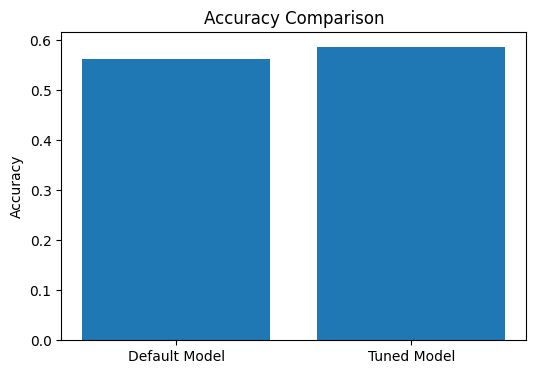

In [7]:
print("\nComparison of Default vs Tuned Model:")
print("--------------------------------------")
print("Default Model Accuracy     :", accuracy_score(y_test_labels, y_pred_labels))
print("Tuned Model Accuracy       :", accuracy_score(y_test_labels, y_pred_best_labels))

print("Default Model F1 Score     :", f1_score(y_test_labels, y_pred_labels, average='weighted'))
print("Tuned Model F1 Score       :", f1_score(y_test_labels, y_pred_best_labels, average='weighted'))

# Visualization: Accuracy comparison
plt.figure(figsize=(6,4))
plt.bar(["Default Model","Tuned Model"],
        [accuracy_score(y_test_labels,y_pred_labels),
         accuracy_score(y_test_labels,y_pred_best_labels)])
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()
